# Synthetic data generation

In [17]:
import requests
import pandas as pd 

fc_url = 'https://services.swpc.noaa.gov/products/solar-wind/plasma-7-day.json'
mag_url = 'https://services.swpc.noaa.gov/products/solar-wind/mag-7-day.json'
fc_response = requests.get(fc_url) 
if fc_response.status_code == 200:
  fc_data = fc_response.json()

data = pd.DataFrame(fc_data[1:], columns = fc_data[0]).set_index('time_tag', drop = True)
data

,density,speed,temperature
time_tag,,,
2024-01-24 11:20:00.000,10.44,451.0,39521
2024-01-24 11:21:00.000,10.55,451.7,40294
2024-01-24 11:22:00.000,10.38,451.4,36724
2024-01-24 11:23:00.000,10.63,451.4,37187
2024-01-24 11:24:00.000,10.76,453.0,49693
...,...,...,...
2024-01-31 11:12:00.000,4.18,429.9,103699
2024-01-31 11:13:00.000,4.18,429.8,108106
2024-01-31 11:14:00.000,4.19,431.0,114999


In [25]:
import os
url = 'https://www.ngdc.noaa.gov/dscovr/data/2016/08/oe_fc1_dscovr_s20160805000000_e20160805235959_p20160806022457_pub.nc.gz'
filename = url.split('_')[1] + '_'+url.split('_')[3][1:-6]+'.nc.gz'
f'{filename[:-6]}.csv' in os.listdir('data/DSCOVR_L1/faraday')

True

In [22]:
f'{filename[:-6]}.csv'

'fc1_20160805.csv'

In [24]:
os.listdir('data/DSCOVR_L1/faraday')

['fc1_20221121.csv',
 'fc1_20220602.csv',
 'fc1_20230622.csv',
 'fc1_20230210.csv',
 'fc1_20170122.csv',
 'fc1_20170408.csv',
 'fc1_20230719.csv',
 'fc1_20230611.csv',
 'fc1_20210117.csv',
 'fc1_20210123.csv',
 'fc1_20160821.csv',
 'fc1_20180514.csv',
 'fc1_20211024.csv',
 'fc1_20220102.csv',
 'fc1_20211029.csv',
 'fc1_20230607.csv',
 'fc1_20210207.csv',
 'fc1_20220218.csv',
 'fc1_20230316.csv',
 'fc1_20210813.csv',
 'fc1_20160816.csv',
 'fc1_20230109.csv',
 'fc1_20220523.csv',
 'fc1_20170206.csv',
 'fc1_20170411.csv',
 'fc1_20210920.csv',
 'fc1_20220905.csv',
 'fc1_20170120.csv',
 'fc1_20230426.csv',
 'fc1_20210911.csv',
 'fc1_20210305.csv',
 'fc1_20230420.csv',
 'fc1_20230111.csv',
 'fc1_20171205.csv',
 'fc1_20220719.csv',
 'fc1_20210323.csv',
 'fc1_20171017.csv',
 'fc1_20161118.csv',
 'fc1_20161115.csv',
 'fc1_20220712.csv',
 'fc1_20180507.csv',
 'fc1_20211027.csv',
 'fc1_20161211.csv',
 'fc1_20170924.csv',
 'fc1_20230117.csv',
 'fc1_20230404.csv',
 'fc1_20170207.csv',
 'fc1_2023021

In [56]:
import sunpy.map
from sunpy.net import Fido, attrs as a
from astropy import units as u
from datetime import datetime, timedelta
result = Fido.search(
  a.Time(datetime(2023, 1, 20, 0), datetime(2023, 1, 20, 2)),
  a.Instrument('AIA'),
  a.Wavelength(94 * u.Angstrom),
  a.Sample(5*u.min),
  a.Resolution('(<)(512)')
)

In [36]:
images = Fido.fetch(result, path =  './data/SDO/AIA')

Files Downloaded: 0file [00:00, ?file/s]

In [57]:
result

<sunpy.net.fido_factory.UnifiedResponse object at 0x7fee6c5619f0>
Results from 0 Providers:

In [22]:
from astropy.io import fits
with fits.open('./' + images[0]) as hdulist:
  # Access the data array from the primary HDU
  data_array = hdulist[0].data

In [30]:
with fits.open('data/SDO/AIA/aia_lev1_94a_2023_01_20t00_00_11_12z_image_lev1.fits') as hdul:
  data = hdul[1].data

In [34]:
data.shape

(4096, 4096)

In [33]:
type(data)

numpy.ndarray

In [1]:
import sunpy.map
from sunpy.net import Fido, attrs as a
from astropy import units as u
from datetime import datetime, timedelta
wavelengths = [94, 131, 193, 171, 304, 1600]
files = []
for wavelength in wavelengths:
  result = Fido.search(
    a.Time(datetime(2023, 1, 20, 1), datetime(2023, 1, 20, 2)),
    a.Instrument('AIA'),
    a.Wavelength(wavelength * u.Angstrom),
    a.Sample(5*u.min),
  )
  print(result)


Results from 1 Provider:

12 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 813.466 Mbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2023-01-20 01:00:11.000 2023-01-20 01:00:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:05:11.000 2023-01-20 01:05:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:10:11.000 2023-01-20 01:10:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:15:11.000 2023-01-20 01:15:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:20:11.000 2023-01-20 01:20:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:25:11.000 2023-01-20 01:25:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:30:11.000 2023-01-20 01:30:12.000    SDO ...    FULLDISK 64.64844
2023-01-20 01:35:11.000 2023-01-20 01:35:12.000    SDO ... 

In [56]:
result.all_colnames

['End Time',
 'Extent Length',
 'Extent Type',
 'Extent Width',
 'Instrument',
 'Physobs',
 'Provider',
 'Size',
 'Source',
 'Start Time',
 'Wavelength',
 'Wavetype',
 'fileid']

In [54]:
Fido.fetch(result)

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

aia_lev1_94a_2023_01_20t01_30_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

aia_lev1_94a_2023_01_20t01_20_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

aia_lev1_94a_2023_01_20t01_00_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

aia_lev1_94a_2023_01_20t01_40_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

aia_lev1_94a_2023_01_20t01_10_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

aia_lev1_94a_2023_01_20t01_50_11_12z_image_lev1.fits:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

['/home/jenci/sunpy/data/aia_lev1_94a_2023_01_20t01_00_11_12z_image_lev1.fits', '/home/jenci/sunpy/data/aia_lev1_94a_2023_01_20t01_10_11_12z_image_lev1.fits', '/home/jenci/sunpy/data/aia_lev1_94a_2023_01_20t01_20_11_12z_image_lev1.fits', '/home/jenci/sunpy/data/aia_lev1_94a_2023_01_20t01_30_11_12z_image_lev1.fits', '/home/jenci/sunpy/data/aia_lev1_94a_2023_01_20t01_40_11_12z_image_lev1.fits', '/home/jenci/sunpy/data/aia_lev1_94a_2023_01_20t01_50_11_12z_image_lev1.fits']

In [36]:
import sunpy.map
from sunpy.net import Fido, attrs as a
from astropy import units as u
from datetime import datetime, timedelta
import drms

time_interval = timedelta(minutes = 12)
start_date = datetime(2023, 1, 20, 0,0,0)
final_date = datetime(2023, 1, 20, 2, 0, 0)
eps = timedelta(seconds = 1)
current_date = start_date

while current_date < final_date:
  result = Fido.search(
    a.Time(current_date, current_date + eps),
    a.jsoc.Series('aia.lev1_euv_12s'),
    a.jsoc.Segment('image'),
    
  )
  print(result)
  current_date += time_interval

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2023-01-19T23:59:59Z  SDO/AIA    AIA_4       94    2266
2023-01-19T23:59:59Z  SDO/AIA    AIA_1      131    2266
2023-01-19T23:59:59Z  SDO/AIA    AIA_3      171    2266
2023-01-19T23:59:59Z  SDO/AIA    AIA_2      193    2266
2023-01-19T23:59:59Z  SDO/AIA    AIA_2      211    2266
2023-01-19T23:59:59Z  SDO/AIA    AIA_4      304    2266
2023-01-19T23:59:59Z  SDO/AIA    AIA_1      335    2266


Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2023-01-20T00:11:59Z  SDO/AIA    AIA_4       94    2266
2023-01-20T00:11:59Z  SDO/AIA    AIA_1      131    2266
2023-01-20T00:11:59Z  SDO/AIA    AIA_3      171    2266
2023-01-20T00:11:59Z  SDO/AIA   

In [33]:
import drms
client = drms.Client()
client.info('aia.lev1_euv_12s').segments.index.values

array(['image', 'spikes'], dtype=object)

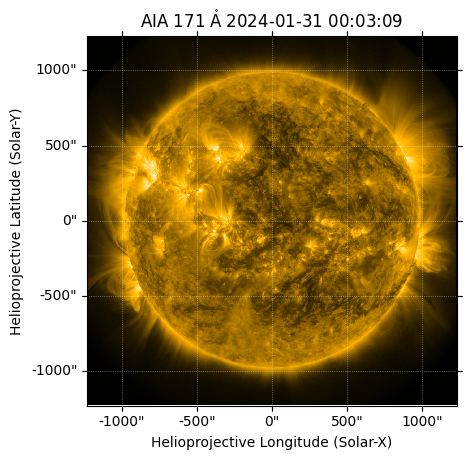

In [ ]:
aia_map = sunpy.map.Map(files)
aia_map[1].plot()

'/home/jenci/sunpy/data/aia_lev1_171a_2023_01_20t02_00_09_35z_image_lev1.fits'

In [63]:
result = Fido.search(
  a.Time(datetime(2023, 10, 26, 0), datetime(2023, 10, 26, 1)),
  a.jsoc.Series('aia.lev1_euv_12s'),
  a.jsoc.Segment('image'),
  a.Sample(5*u.min),
  a.jsoc.PrimeKey('WAVELNTH', '94'),
  a.jsoc.Notify('jorged.encyso@gmail.com'),
  a.jsoc.Resolution(0.25)
)

AttributeError: module 'sunpy.net.jsoc.attrs' has no attribute 'Resolution'

In [62]:
result

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str20,str7,str5,int64,int64
2023-10-25T23:59:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:04:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:09:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:14:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:19:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:24:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:29:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:34:59Z,SDO/AIA,AIA_4,94,2276
2023-10-26T00:39:59Z,SDO/AIA,AIA_4,94,2276


In [1]:
import torch

In [5]:
a = torch.randn(32,96, 10)

a[:, 1:].size()

torch.Size([32, 95, 10])

In [9]:
torch.cat([torch.zeros(1,10),torch.randn(32,95,10)], dim = -2 )[0]

RuntimeError: Tensors must have same number of dimensions: got 2 and 3

In [12]:
for i in range(0,1):
  print(i)

0


In [5]:
import torch
B = 32
S = 96
num_heads = 2
head_dim = 5

Q = torch.randn(32,96,10)

Q.view(B,S,num_heads, head_dim).transpose(1,2).transpose(-1,-2) == Q.view(B,num_heads, head_dim, S)

True

In [78]:
from ftplib import FTP
files = [
        './pub/lists/ace/ace_swepam_1m.txt',
        './pub/lists/ace/ace_sis_5m.txt',
        './pub/lists/ace/ace_mag_1m.txt',
        './pub/lists/ace/ace_epam_5m.txt'
      ]
with FTP('ftp.swpc.noaa.gov') as ftp:
  ftp.login()
  for file in files:
    with open(file.split('_')[-2] + '.txt', 'wb') as local_file:
      ftp.retrbinary(f'RETR {file}', local_file.write)

In [36]:
dates = []
with open('mag_storms.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
    dates.append((line.split()[1], max([int(i) for i in line.replace('-', '').replace('+','').split()[3:]])))

In [47]:
from datetime import datetime, timedelta

def classify_dates(dates):

    dates = [datetime.strptime(date[0],"%Y/%m/%d") for date in dates]

    # Sort the list of dates
    dates.sort()
    
    # Initialize variables
    classified_dates = []
    current_interval = [dates[0]]
    # Iterate through the sorted list of dates
    for i in range(1, len(dates)):
        # Calculate the difference between current date and previous date
        delta = (dates[i] - timedelta(days = 4)) - (dates[i-1] + timedelta(days = 2))
        
        # If the difference is 4 days or less, append the date to the current interval
        if delta <= timedelta(days=2):
            current_interval.append(dates[i])
        else:
            # If the difference is more than 4 days, finalize the current interval
            classified_dates.append(current_interval)
            # Start a new interval with the current date
            current_interval = [dates[i]]
    
    # Append the last interval
    classified_dates.append(current_interval)
    
    return classified_dates

In [48]:
date_intervals = classify_dates(dates)

In [51]:
init_date = lambda date: date - timedelta(days = 4)
last_date = lambda date: date + timedelta(days = 2)
date_intervals = [(datetime.strftime(init_date(interval[0]), "%Y-%m-%d"), datetime.strftime(last_date(interval[-1]), "%Y-%m-%d"))\
                  for interval in date_intervals]

In [52]:
date_intervals

[('1999-12-28', '2000-01-02'),
 ('2000-01-07', '2000-01-12'),
 ('2000-01-19', '2000-01-24'),
 ('2000-02-03', '2000-02-15'),
 ('2000-04-02', '2000-04-08'),
 ('2000-05-13', '2000-05-25'),
 ('2000-06-04', '2000-06-27'),
 ('2000-07-07', '2000-07-30'),
 ('2000-08-06', '2000-08-14'),
 ('2000-08-24', '2000-09-05'),
 ('2000-09-12', '2000-09-20'),
 ('2000-09-26', '2000-10-15'),
 ('2000-10-25', '2000-11-11'),
 ('2000-11-22', '2000-11-30'),
 ('2000-12-19', '2000-12-24'),
 ('2001-01-25', '2001-01-30'),
 ('2001-03-01', '2001-03-06'),
 ('2001-03-15', '2001-04-29'),
 ('2001-05-05', '2001-05-14'),
 ('2001-05-29', '2001-06-19'),
 ('2001-07-05', '2001-07-10'),
 ('2001-07-27', '2001-08-18'),
 ('2001-09-19', '2001-10-13'),
 ('2001-10-17', '2001-11-08'),
 ('2001-11-20', '2001-11-25'),
 ('2002-01-06', '2002-01-12'),
 ('2002-02-01', '2002-02-06'),
 ('2002-02-24', '2002-03-01'),
 ('2002-03-14', '2002-03-25'),
 ('2002-04-13', '2002-04-24'),
 ('2002-05-07', '2002-05-24'),
 ('2002-07-13', '2002-07-18'),
 ('2002-

In [1]:
from data.datasets import *
scrap_date_list = DscovrScrapIntervals.eight_nine
FineTuningImageDataset(scrap_date_list, timedelta(hours = 2), timedelta(hours = 2))

In [9]:
from spacepy import pycdf 
from torchvision.datasets.utils import download_url
download_url('https://cdaweb.gsfc.nasa.gov/sp_phys/data/omni/hro2_5min/2023/omni_hro2_5min_20231201_v01.cdf', '.', 'omni_hro2_5min_20231201_v01.cdf')
with pycdf.CDF('omni_hro2_5min_20231201_v01.cdf') as cdf_file:
    # Get the variable names
    variable_names = cdf_file.keys()

    print(variable_names)

['BX_GSE', 'BY_GSE', 'BZ_GSE', 'Mach_num', 'Mgs_mach_num', 'PR-FLX_10', 'PR-FLX_30', 'PR-FLX_60', 
 'proton_density', 'flow_speed', 'Vx', 'Vy', 'Vz']

100%|██████████| 2130328/2130328 [00:01<00:00, 1447197.71it/s]

KeysView(<CDF:
AE_INDEX: CDF_INT4 [8928]
AL_INDEX: CDF_INT4 [8928]
ASY_D: CDF_INT4 [8928]
ASY_H: CDF_INT4 [8928]
AU_INDEX: CDF_INT4 [8928]
BSN_x: CDF_REAL4 [8928]
BSN_y: CDF_REAL4 [8928]
BSN_z: CDF_REAL4 [8928]
BX_GSE: CDF_REAL4 [8928]
BY_GSE: CDF_REAL4 [8928]
BY_GSM: CDF_REAL4 [8928]
BZ_GSE: CDF_REAL4 [8928]
BZ_GSM: CDF_REAL4 [8928]
Beta: CDF_REAL4 [8928]
Day: CDF_INT4 [8928]
E: CDF_REAL4 [8928]
Epoch: CDF_EPOCH [8928]
F: CDF_REAL4 [8928]
HR: CDF_INT4 [8928]
IMF: CDF_INT4 [8928]
IMF_PTS: CDF_INT4 [8928]
Mach_num: CDF_REAL4 [8928]
Mgs_mach_num: CDF_REAL4 [8928]
Minute: CDF_INT4 [8928]
NaNp_Ratio: CDF_REAL4 [8928]
PLS: CDF_INT4 [8928]
PLS_PTS: CDF_INT4 [8928]
PR-FLX_10: CDF_REAL4 [8928]
PR-FLX_30: CDF_REAL4 [8928]
PR-FLX_60: CDF_REAL4 [8928]
Pressure: CDF_REAL4 [8928]
RMS_SD_B: CDF_REAL4 [8928]
RMS_SD_fld_vec: CDF_REAL4 [8928]
RMS_Timeshift: CDF_INT4 [8928]
SYM_D: CDF_INT4 [8928]
SYM_H: CDF_INT4 [8928]
T: CDF_REAL4 [8928]
Time_btwn_obs: CDF_INT4 [8928]
Timeshift: CDF_INT4 [8928]
Vx: CDF

['']